In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('SOCR-HeightWeight.csv',index_col=0)

In [3]:
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [4]:
df.shape

(25000, 2)

In [5]:
df.isnull().sum()  # the data set is clean 

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

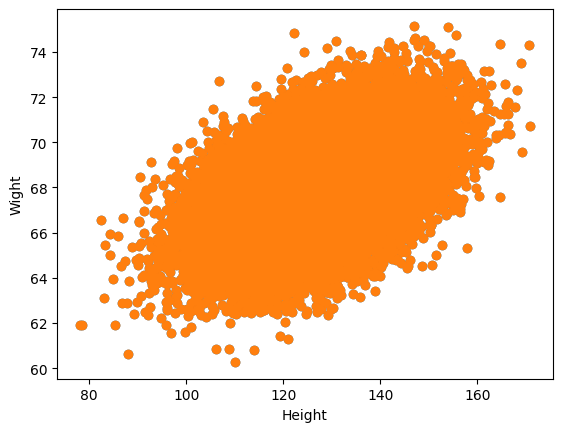

In [13]:
# scatter plot 
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Height')
plt.ylabel('Wight')
plt.show();

In [8]:
## Finding the correlation 
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


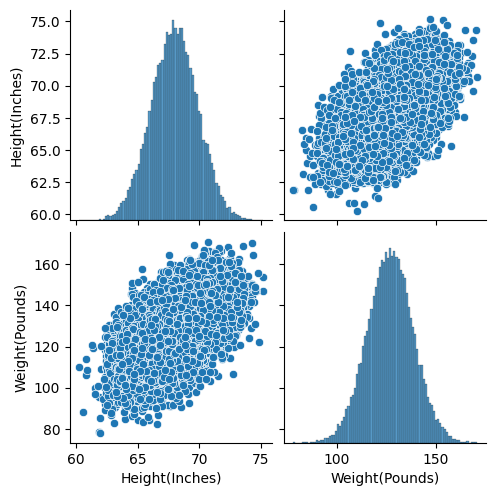

In [11]:
sns.pairplot(df)
plt.show();

In [14]:
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [ ]:
# Independent and Depended features : 
X = df['Weight(Pounds)']   # independent feature should in the form of  DataFram or it can be two dimensinoalarray . 
type(df)
np.array(X).shape
# This is not a good practice 

(25000,)

In [21]:
X = df[['Weight(Pounds)']]  # this is the resason why it's a good praactice becasue it's a datafram
type(X)
np.array(X).shape

(25000, 1)

In [ ]:
y = df['Height(Inches)'] # this can be in the series from or ond dimension array 

In [23]:
y

Index
1        65.78331
2        71.51521
3        69.39874
4        68.21660
5        67.78781
           ...   
24996    69.50215
24997    64.54826
24998    64.69855
24999    67.52918
25000    68.87761
Name: Height(Inches), Length: 25000, dtype: float64

In [24]:
# Train Test Split 

from sklearn.model_selection import train_test_split 


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape  # two dimensiona 

(18750, 1)

In [ ]:
y_train.shape # one dimensional 

(18750,)

In [28]:
# Standardization  ( Z - SCORE ---- mean = 0 , std = 1 )

from sklearn.preprocessing import StandardScaler

In [29]:
# we don't need to apply standardization on the output featture because out gradiant decent is not apply on the ouput feature ( why we do standardization ? )

# Gradint Decent Poblem Solution ( Makingn tranig faster )


In [30]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [31]:
X_test=scaler.transform(X_test)

In [32]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [33]:
## Apply Mahine learning Algorithm  -->> Linear Regression 

from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression(n_jobs=-1)

In [36]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [40]:
print("Co-efficient or slop " ,regression.coef_)

Co-efficient or slop  [0.94883892]


In [41]:
print("Intercept",regression.intercept_)

Intercept 67.9938252704


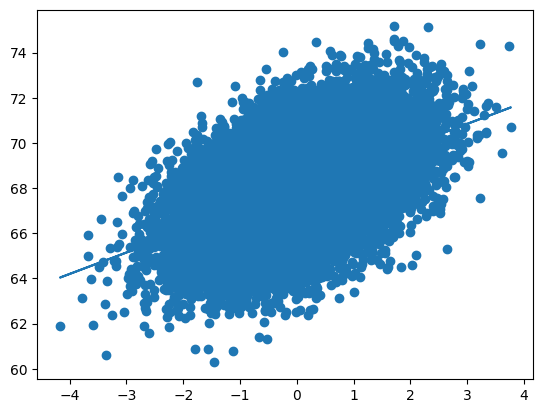

In [ ]:
# plot the traning data plot best fit line 

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show();

Prediction for test data : 

predicted_height output = intercept + coef_(weight)

y_pred_test = 67.9938252704 + 0.94883892(X_train)

In [47]:
y_pred = regression.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.733380799373099
1.3166150322297803
1.6532939240719113


In [50]:
from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test,y_pred)
print(score)

0.25926439414284275


In [52]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

0.25914583850810247

In [55]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.9 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.9 MB 3.1 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.9 MB 3.3 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 3.5 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 3.7 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 3.9 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 3.8 MB/s eta 0:00:01
   -----------------------

In [57]:
import statsmodels.api as sm 

In [58]:
model = sm.OLS(y_train,X_train).fit()

In [59]:
pprediction = model.predict(X_test)
print(pprediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                      0.0561
Time:                        17:59:52   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
# Predict From a new data 
regression.predict(scaler.transform([[105]]))

d:\WorkPlace\Machine Learning\Anaconda\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([66.19315252])

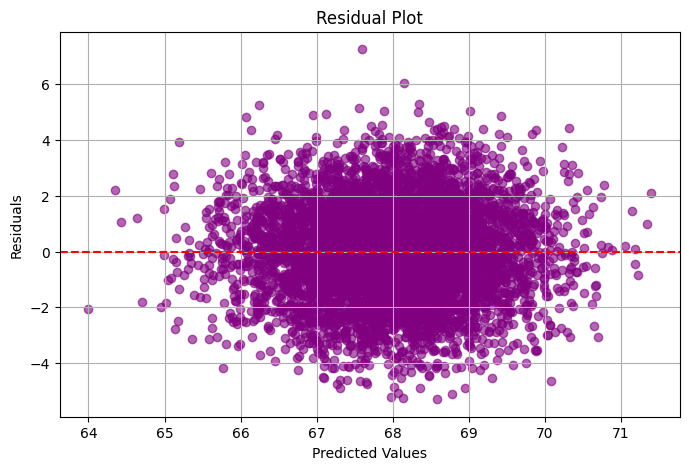

In [67]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()